In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

In [38]:
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
category_translation = pd.read_csv("product_category_name_translation.csv")

## 상품 중심으로 탐색
**카테고리별 판매량 / 매출 비중**

In [39]:
# dataframe 만들기
## 상품의 수요를 중심으로 탐색하기 위해 order_items를 중심으로 products와 category_translation을 left join
## 주문상품 정보 + 카테고리 정보(영어 이름)가 묶인 테이블 완성
category_df = (
    order_items
    .merge(products, on="product_id", how="left")
    .merge(category_translation, on="product_category_name", how="left")
)

category_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


In [40]:
# 카테고리별 주문 수, 판매량 계산
## product_category_name_english 기준 group by
category_orders = (
    category_df
    .groupby("product_category_name_english")
    .agg(
        # order_count = 서로 다른 주문은 몇개인지
        order_count=("order_id", "nunique"),
        # item_count = 같은 상품 카테고리에서 총 몇개의 상품이 팔렸는지
        item_count=("product_id", "count")
    )
    .reset_index()
)

category_orders

,product_category_name_english,order_count,item_count
0,agro_industry_and_commerce,182,212
1,air_conditioning,253,297
2,art,202,209
3,arts_and_craftmanship,23,24
4,audio,350,364
...,...,...,...
66,stationery,2311,2517
67,tablets_printing_image,79,83
68,telephony,4199,4545
69,toys,3886,4117


In [41]:
# 카테고리별 매출
category_revenue = (
    category_df
    .groupby("product_category_name_english")
    .agg(
        revenue=("price", "sum")
    )
    .reset_index()
)
category_revenue

,product_category_name_english,revenue
0,agro_industry_and_commerce,72530.47
1,air_conditioning,55024.96
2,art,24202.64
3,arts_and_craftmanship,1814.01
4,audio,50688.50
...,...,...
66,stationery,230943.23
67,tablets_printing_image,7528.41
68,telephony,323667.53
69,toys,483946.60


In [42]:
# 주문 수 / 매출 집계 합치기
category_summary = (
    category_orders
    .merge(category_revenue, on="product_category_name_english", how="left")
)
category_summary

,product_category_name_english,order_count,item_count,revenue
0,agro_industry_and_commerce,182,212,72530.47
1,air_conditioning,253,297,55024.96
2,art,202,209,24202.64
3,arts_and_craftmanship,23,24,1814.01
4,audio,350,364,50688.50
...,...,...,...,...
66,stationery,2311,2517,230943.23
67,tablets_printing_image,79,83,7528.41
68,telephony,4199,4545,323667.53
69,toys,3886,4117,483946.60


In [43]:
# 전체 카테고리 대비 해당 카테고리 주문 비중 계산
category_summary["order_share"] = (
    category_summary["order_count"]
    / category_summary["order_count"].sum()
)

# 전체 카테고리 대비 해당 카테고리 매출 비중 계산
category_summary["revenue_share"] = (
    category_summary["revenue"]
    / category_summary["revenue"].sum()
)

In [44]:
# 판매수량이 높은순으로 내림차순
category_summary = category_summary.sort_values(
    "item_count", ascending=False
)

category_summary.head(10)

,product_category_name_english,order_count,item_count,revenue,order_share,revenue_share
7,bed_bath_table,9417,11115,1036988.68,0.096095,0.077349
43,health_beauty,8836,9670,1258681.34,0.090166,0.093885
65,sports_leisure,7720,8641,988048.97,0.078778,0.073699
39,furniture_decor,6449,8334,729762.49,0.065808,0.054433
15,computers_accessories,6689,7827,911954.32,0.068257,0.068023
49,housewares,5884,6964,632248.66,0.060043,0.047160
70,watches_gifts,5624,5991,1205005.68,0.057390,0.089882
68,telephony,4199,4545,323667.53,0.042848,0.024142
42,garden_tools,3518,4347,485256.46,0.035899,0.036195
5,auto,3897,4235,592720.11,0.039767,0.044211


In [45]:
# 매출이 높은순으로 내림차순
category_summary = category_summary.sort_values(
    "revenue", ascending=False
)

category_summary.head(10)

,product_category_name_english,order_count,item_count,revenue,order_share,revenue_share
43,health_beauty,8836,9670,1258681.34,0.090166,0.093885
70,watches_gifts,5624,5991,1205005.68,0.057390,0.089882
7,bed_bath_table,9417,11115,1036988.68,0.096095,0.077349
65,sports_leisure,7720,8641,988048.97,0.078778,0.073699
15,computers_accessories,6689,7827,911954.32,0.068257,0.068023
39,furniture_decor,6449,8334,729762.49,0.065808,0.054433
20,cool_stuff,3632,3796,635290.85,0.037062,0.047386
49,housewares,5884,6964,632248.66,0.060043,0.047160
5,auto,3897,4235,592720.11,0.039767,0.044211
42,garden_tools,3518,4347,485256.46,0.035899,0.036195


In [46]:
# 판매 수량 기준 Top 10
top10_by_item = (
    category_summary
    .sort_values("item_count", ascending=False)
    .head(10)
)

# 매출 기준 Top 10
top10_by_revenue = (
    category_summary
    .sort_values("revenue", ascending=False)
    .head(10)
)

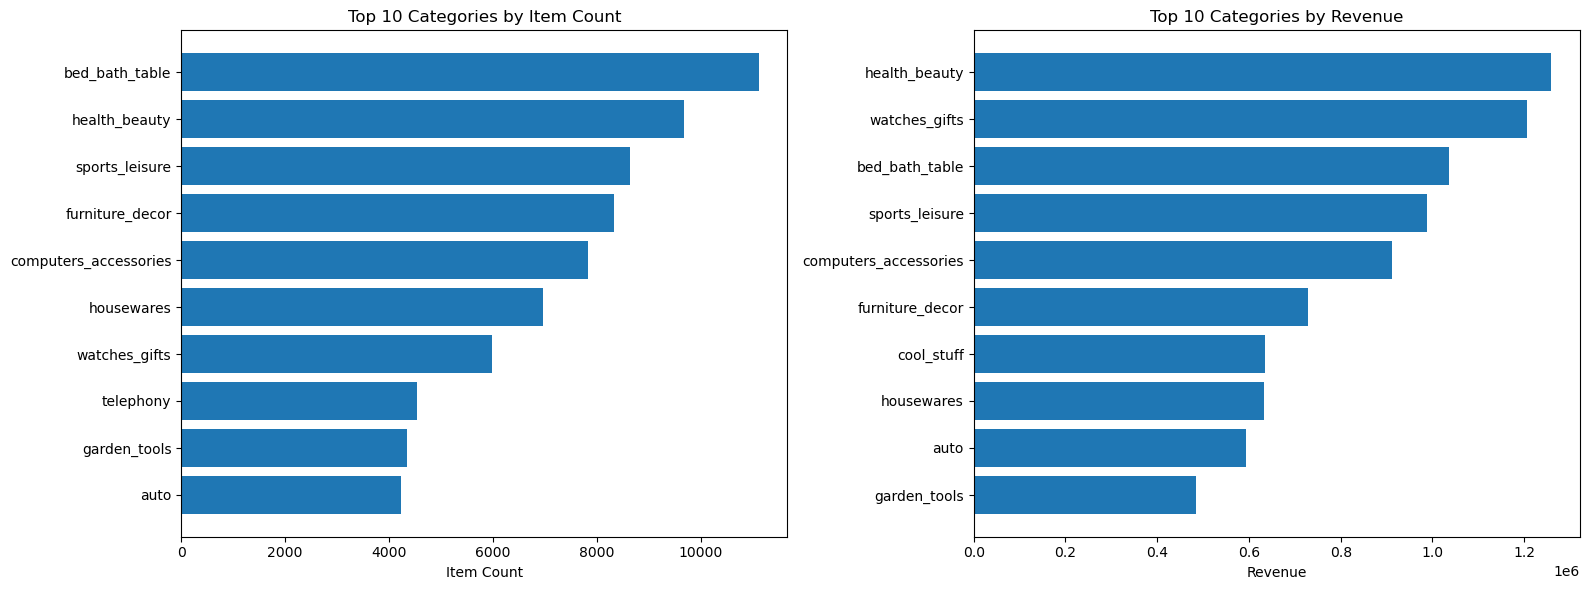

In [47]:
# 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# (1) 판매 수량 기준
axes[0].barh(
    top10_by_item["product_category_name_english"],
    top10_by_item["item_count"]
)
axes[0].set_title("Top 10 Categories by Item Count")
axes[0].set_xlabel("Item Count")
axes[0].invert_yaxis()  # 상위가 위로 오게

# (2) 매출 기준
axes[1].barh(
    top10_by_revenue["product_category_name_english"],
    top10_by_revenue["revenue"]
)
axes[1].set_title("Top 10 Categories by Revenue")
axes[1].set_xlabel("Revenue")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

- bed_bath_table이 판매량은 1위지만, 매출은 3위 기록
- health_beauty 제품은 판매량은 2위지만, 매출은 1위 기록
- health_beauty 시장에서 한국 제품의 이미지가 좋을 것으로 예상

## 지역 중심으로 탐색
- 지역별 구매자 수 / 주문 수
- 지역별 주문 1건당 평균 결제 금액 (AOV)
- 배송 지연 시 저평점 전환율
- 경쟁자들이 많이 없는 지역 탐색

In [48]:
# EDA에 사용할 DataFrame 만들기
customer_df = (
    orders
    .merge(customers, on="customer_id", how="left")
)

# 결제 정보 집계
payment_agg = (
    order_payments
    .groupby("order_id", as_index=False)
    .agg(payment_value=("payment_value", "sum"))
)

# customer_df에 merge
customer_df = customer_df.merge(
    payment_agg,
    on="order_id",
    how="left"
)

In [49]:
# 배송 지연 여부 datetime으로 dtype 변환
customer_df["order_purchase_timestamp"] = pd.to_datetime(
    customer_df["order_purchase_timestamp"]
)
customer_df["order_delivered_customer_date"] = pd.to_datetime(
    customer_df["order_delivered_customer_date"]
)
customer_df["order_estimated_delivery_date"] = pd.to_datetime(
    customer_df["order_estimated_delivery_date"]
)

# 배송 지연 여부
customer_df["is_delayed"] = (
    customer_df["order_delivered_customer_date"]
    > customer_df["order_estimated_delivery_date"]
)

# 리뷰 정보 join 
customer_df = customer_df.merge(
    order_reviews[["order_id", "review_score"]],
    on="order_id",
    how="left"
)

customer_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_value,is_delayed,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,38.71,False,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,141.46,False,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,179.12,False,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,72.20,False,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,28.62,False,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,85.08,False,5.0
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,195.00,False,4.0
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,271.01,False,5.0
99990,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,441.16,False,2.0


In [50]:
# 낮은 리뷰 점수 필터링
customer_df["is_low_review"] = customer_df["review_score"] <= 2

# 첫구매 / 재구매 여부 판단
first_order = (
    customer_df
    .groupby("customer_unique_id")["order_purchase_timestamp"]
    .min()
    .reset_index()
    .rename(columns={"order_purchase_timestamp": "first_order_date"})
)

# customer_df와 join
customer_df = customer_df.merge(
    first_order,
    on="customer_unique_id",
    how="left"
)

# 신규고객과 재구매 고객 분류 가능하도록 컬럼 추가
customer_df["is_first_purchase"] = (
    customer_df["order_purchase_timestamp"]
    == customer_df["first_order_date"]
)

In [51]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99992 entries, 0 to 99991
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99992 non-null  object        
 1   customer_id                    99992 non-null  object        
 2   order_status                   99992 non-null  object        
 3   order_purchase_timestamp       99992 non-null  datetime64[ns]
 4   order_approved_at              99831 non-null  object        
 5   order_delivered_carrier_date   98199 non-null  object        
 6   order_delivered_customer_date  97005 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99992 non-null  datetime64[ns]
 8   customer_unique_id             99992 non-null  object        
 9   customer_zip_code_prefix       99992 non-null  int64         
 10  customer_city                  99992 non-null  object        
 11  customer_state 

In [52]:
customer_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_value,is_delayed,review_score,is_low_review,first_order_date,is_first_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,38.71,False,4.0,False,2017-09-04 11:26:38,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,141.46,False,4.0,False,2018-07-24 20:41:37,True
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,179.12,False,5.0,False,2018-08-08 08:38:49,True
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,72.20,False,5.0,False,2017-11-18 19:28:06,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,28.62,False,5.0,False,2018-02-13 21:18:39,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,85.08,False,5.0,False,2017-03-09 09:54:05,True
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,195.00,False,4.0,False,2018-02-06 12:58:58,True
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,271.01,False,5.0,False,2017-08-27 14:46:43,True
99990,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,441.16,False,2.0,True,2018-01-08 21:28:27,True


### 지역별 구매자 수 / 주문 수

In [53]:
region_summary = (
    customer_df
    .groupby("customer_state")
    .agg(
        buyers=("customer_unique_id", "nunique"),  # 구매자 수
        orders=("order_id", "nunique")              # 주문 수
    )
    .reset_index()
    .sort_values("orders", ascending=False)
)

region_summary.head()

,customer_state,buyers,orders
25,SP,40302,41746
18,RJ,12384,12852
10,MG,11259,11635
22,RS,5277,5466
17,PR,4882,5045


In [76]:
# 주문량 기준 내림차순
region_summary_sorted = (
    region_summary
    .sort_values("orders", ascending=False)
)

region_summary_sorted.head(10)

,customer_state,buyers,orders,orders_per_buyer
25,SP,40302,41746,1.035829
18,RJ,12384,12852,1.037791
10,MG,11259,11635,1.033396
22,RS,5277,5466,1.035816
17,PR,4882,5045,1.033388
23,SC,3534,3637,1.029145
4,BA,3277,3380,1.031431
6,DF,2075,2140,1.031325
7,ES,1964,2033,1.035132
8,GO,1952,2020,1.034836


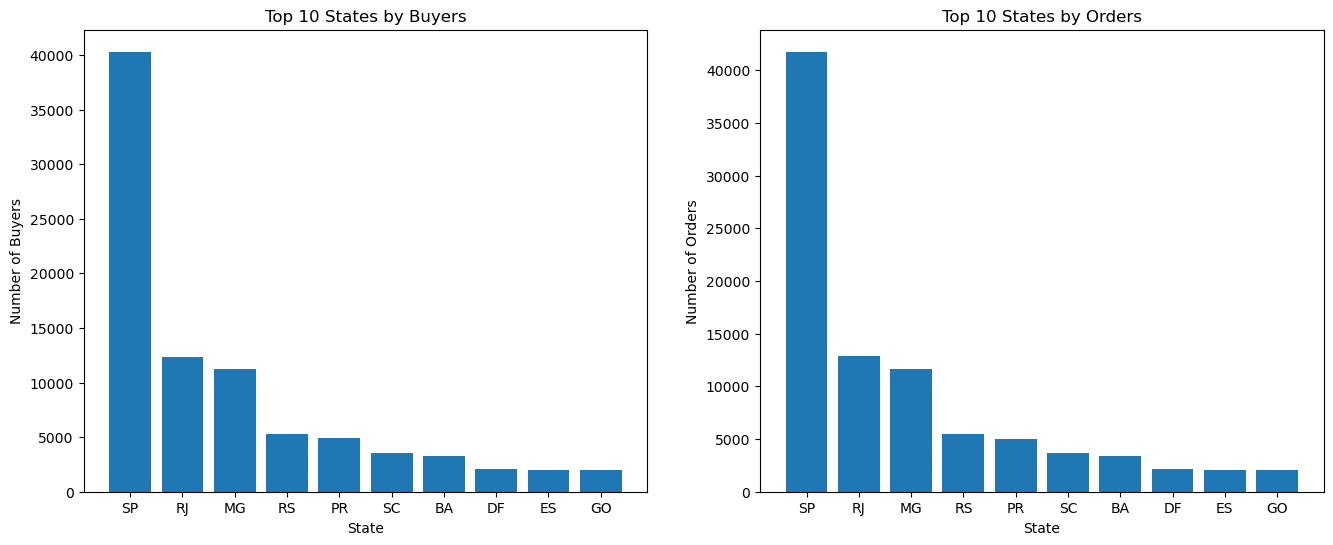

In [55]:
# 최고 빈도 10개 지역 추출
top10 = (
    region_summary
    .sort_values("orders", ascending=False)
    .head(10)
)

# 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axes[0].bar(top10["customer_state"], top10["buyers"])
axes[0].set_title("Top 10 States by Buyers")
axes[0].set_xlabel("State")
axes[0].set_ylabel("Number of Buyers")

axes[1].bar(top10["customer_state"], top10["orders"])
axes[1].set_title("Top 10 States by Orders")
axes[1].set_xlabel("State")
axes[1].set_ylabel("Number of Orders")

plt.show()

- 상위 10개 주의 구매자 수와 주문 수가 비례하는 것으로 보임

### 지역별 주문 1건당 평균 결제 금액 (AOV)

In [78]:
# 지역을 기준으로 총 매출과 총 주문수 계산
region_aov = (
    customer_df
    .groupby("customer_state")
    .agg(
        total_revenue=("payment_value", "sum"),   # 총 매출
        orders=("order_id", "nunique")             # 주문 수
    )
    .reset_index()
)

# 주문당 평균 구매금액 (AOV)
region_aov["aov"] = (
    region_aov["total_revenue"] / region_aov["orders"]
)

region_aov.sort_values("aov", ascending=False).head(10)

,customer_state,total_revenue,orders,aov
14,PB,141660.45,536,264.291884
0,AC,19680.62,81,242.970617
20,RO,60866.20,253,240.577866
3,AP,16262.80,68,239.158824
1,AL,97264.75,413,235.507869
13,PA,218931.10,975,224.544718
26,TO,61485.33,280,219.590464
16,PI,108605.19,495,219.404424
21,RR,10064.62,46,218.796087
24,SE,75246.25,350,214.989286


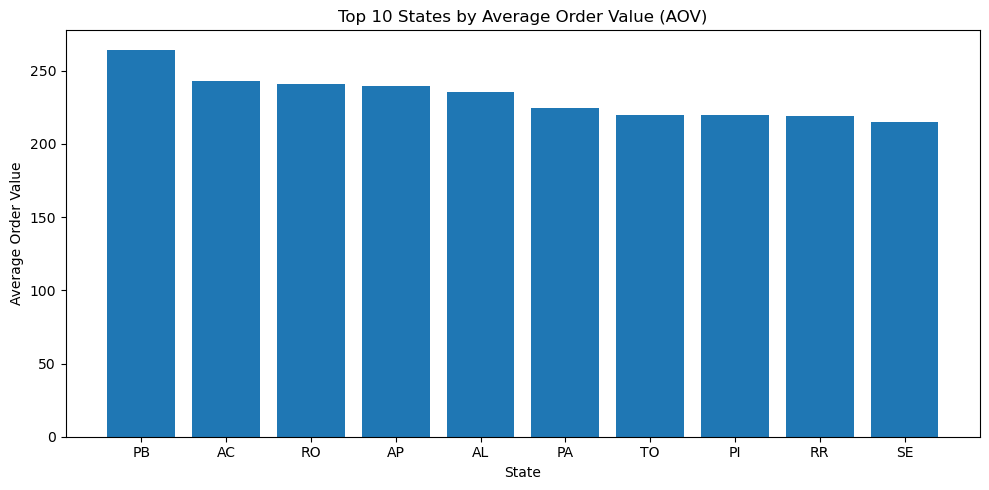

In [79]:
# 시각화
top10_aov = (
    region_aov
    .sort_values("aov", ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
plt.bar(top10_aov["customer_state"], top10_aov["aov"])

plt.title("Top 10 States by Average Order Value (AOV)")
plt.xlabel("State")
plt.ylabel("Average Order Value")

plt.tight_layout()
plt.show()

- SP가 주문수는 압도적으로 많지만, 주문 1건당 평균 결제 금액은 상대적으로 낮은 것으로 보임
- 그에 반해 BA는 주문수 상위 10개 안에는 없지만, 가장 높은 AOV를 보임
- 주문수와 AOV가 균형을 이루는 지역은 RJ와 MG지만, SP가 주문수가 압도적으로 높음

### 배송 지연 시 저평점 전환율
- 배송 지연 시 저평점(1-2점) 전환율 (지역 단위)
- 전환율 = ( 배송지연 & 저평점 주문 수 ) / 배송 지연 주문 수

In [57]:
# 분석용 DataFrame 생성
# 주문 정보 + 주문한 고객 정보 + 주문 리뷰 합친 DF 생성
base_df = (
    orders
    .merge(customers, on="customer_id", how="left")
    .merge(order_reviews, on="order_id", how="left")
)

base_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,e262b3f92d1ce917aa412a9406cf61a6,5.0,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
99990,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


In [58]:
# 배송 지연 일수 계산
base_df["delay_days"] = (
    pd.to_datetime(base_df["order_delivered_customer_date"])
    - pd.to_datetime(base_df["order_estimated_delivery_date"])
).dt.days

base_df[base_df['delay_days'] > 0].shape

(6563, 19)

In [59]:
# 저평점 여부 컬럼 추가
base_df["is_low_review"] = base_df["review_score"].isin([1, 2])

base_df["is_low_review"]

0        False
1        False
2        False
3        False
4        False
         ...  
99987    False
99988    False
99989    False
99990     True
99991    False
Name: is_low_review, Length: 99992, dtype: bool

In [60]:
# 배송지연이 있는 row만 필터링해서 새로운 DataFrame 생성
delayed_df = base_df[base_df["delay_days"] > 0]

delayed_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delay_days,is_low_review
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28 00:00:00,d699688533772c15a061e8ce81cb56df,4001,sao paulo,SP,38cae21b1b57a95959440380d5b2ef7a,2.0,NaN,os correios estäo em greve... näo recebi nenhu...,2017-10-01 00:00:00,2017-10-01 17:55:21,11.0,True
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12 00:00:00,a25d5f94840d3c6a1a49f271ed83f4ec,21715,rio de janeiro,RJ,6a1a8e54de03ab98e6e8ff56e56e507f,2.0,NaN,Demora muito entregar. Já passou o prazo e ain...,2018-03-16 00:00:00,2018-03-20 23:10:58,9.0,True
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21 00:00:00,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP,5caca29ffffe9086162ca51303817420,1.0,NaN,"Inicialmente, na data da compra o produto era ...",2017-12-22 00:00:00,2017-12-28 11:25:32,7.0,True
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02 00:00:00,ddf60e20e6e262e2136801ce5cd628b0,49030,aracaju,SE,4ff7c437ae60fa0b3c700ade55155027,1.0,NaN,"Pedir 2 capinhas,estou pagando as duas e só ve...",2018-04-04 00:00:00,2018-04-04 09:31:50,1.0,True
58,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13 18:14:36,2017-03-13 18:14:36,2017-03-22 14:03:09,2017-04-06 13:37:16,2017-03-30 00:00:00,51838d41add414a0b1b989b7d251d9ee,13068,campinas,SP,19d60869413aa63834affc9ecc9d9f90,1.0,NaN,Não recebi,2017-04-02 00:00:00,2017-04-02 10:58:38,7.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99947,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16 00:00:00,f690f0caffab80b6f849f08ba1692925,9330,maua,SP,103d39074fa26b7bfd65101962bbec58,2.0,NaN,Não recebi o produto.,2018-08-18 00:00:00,2018-08-18 17:13:46,5.0,True
99948,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02 00:00:00,4b855cb19adce3763ce1af3acc2aae0b,3122,sao paulo,SP,d6e89c99dd004e190fb802797253e9ba,1.0,NaN,"Nao volto a comprar com esta loja , demorando ...",2018-04-04 00:00:00,2018-04-04 10:15:42,3.0,True
99974,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31 00:00:00,a3983b8b6b679c9f645e6ef9517ac98d,14802,araraquara,SP,4a57b77d844594f24904a568218a2d96,1.0,NaN,nao recebi o produto que ja paguei ! nao recom...,2017-11-03 00:00:00,2017-11-06 18:50:22,21.0,True
99976,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09 00:00:00,397cd1affbb66fa8f76e8ac24685440a,13272,valinhos,SP,6b2ee488cd87d8a9ee67eb63ad5a7a4c,1.0,NaN,"Prateleiras com cantos vivo, colunas nao encai...",2018-04-11 00:00:00,2018-04-11 12:41:03,2.0,True


In [61]:
# 지역(customer_state)을 기준으로 group by 
state_delay_rate = (
    delayed_df
    .groupby("customer_state")
    .agg(
        # 지연이 있는 주문의 수
        delayed_orders=("order_id", "nunique"),
        # 낮은 평점의 수
        low_review_orders=("is_low_review", "sum"),
        # 평균 지연일 수
        avg_delay_days=("delay_days", "mean")
    )
    .reset_index()
)

# 지연이 있을 때 낮은 평점으로 전환되는 비율
state_delay_rate["delay_to_low_review_rate"] = (
    state_delay_rate["low_review_orders"] / state_delay_rate["delayed_orders"]
)

# 지연 배송이 50건 이상인 주 중에서 저평점 전환율이 가장 낮은 순으로 정렬
state_delay_rate_filtered = (
    state_delay_rate
    [state_delay_rate["delayed_orders"] >= 50]   # 표본 수 필터
    .sort_values("delay_to_low_review_rate", ascending=True)  # 전환율 오름차순
)

state_delay_rate_filtered.head(10)

,customer_state,delayed_orders,low_review_orders,avg_delay_days,delay_to_low_review_rate
12,MT,53,27,10.641509,0.509434
17,PR,199,102,8.450000,0.512563
25,SP,1820,972,8.334065,0.534066
7,ES,214,115,11.299065,0.537383
10,MG,520,299,8.421456,0.575000
4,BA,396,232,12.037500,0.585859
23,SC,291,172,8.361775,0.591065
14,PB,54,32,10.333333,0.592593
11,MS,68,41,8.338235,0.602941
8,GO,128,79,11.376923,0.617188


In [62]:
# 지연 일수 구간 설정
bins = [0, 1, 2, 3, 5, 7, 10, 14, 21, 30]
labels = ["1d", "2d", "3d", "4-5d", "6-7d", "8-10d", "11-14d", "15-21d", "21d+"]

delayed_df["delay_bin"] = pd.cut(
    delayed_df["delay_days"],
    bins=bins,
    labels=labels,
    right=True
)

# 지연 구간 별 저평점 전환율 계산
delay_bin_rate = (
    delayed_df
    .groupby("delay_bin")
    .agg(
        delayed_orders=("order_id", "nunique"),
        low_review_orders=("is_low_review", "sum")
    )
    .reset_index()
)

delay_bin_rate["delay_to_low_review_rate"] = (
    delay_bin_rate["low_review_orders"]
    / delay_bin_rate["delayed_orders"]
)

delay_bin_rate.head()

/var/folders/j8/zxc2cbt94j94y741fxn1qyrm0000gn/T/ipykernel_62954/2395667327.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed_df["delay_bin"] = pd.cut(
/var/folders/j8/zxc2cbt94j94y741fxn1qyrm0000gn/T/ipykernel_62954/2395667327.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("delay_bin")


,delay_bin,delayed_orders,low_review_orders,delay_to_low_review_rate
0,1d,825,162,0.196364
1,2d,545,185,0.339450
2,3d,500,250,0.500000
3,4-5d,900,527,0.585556
4,6-7d,902,661,0.732816


In [63]:
# 지역마다 임계 지연열이 다를 수 있는지 확인
state_delay_bin_rate = (
    delayed_df
    .groupby(["customer_state", "delay_bin"])
    .agg(
        delayed_orders=("order_id", "nunique"),
        low_review_orders=("is_low_review", "sum")
    )
    .reset_index()
)

state_delay_bin_rate["delay_to_low_review_rate"] = (
    state_delay_bin_rate["low_review_orders"]
    / state_delay_bin_rate["delayed_orders"]
)

/var/folders/j8/zxc2cbt94j94y741fxn1qyrm0000gn/T/ipykernel_62954/1802007412.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["customer_state", "delay_bin"])


In [64]:
state_delay_bin_rate

,customer_state,delay_bin,delayed_orders,low_review_orders,delay_to_low_review_rate
0,AC,1d,1,0,0.0
1,AC,2d,0,0,NaN
2,AC,3d,0,0,NaN
3,AC,4-5d,0,0,NaN
4,AC,6-7d,0,0,NaN
...,...,...,...,...,...
238,TO,6-7d,8,4,0.5
239,TO,8-10d,5,4,0.8
240,TO,11-14d,1,1,1.0
241,TO,15-21d,0,0,NaN


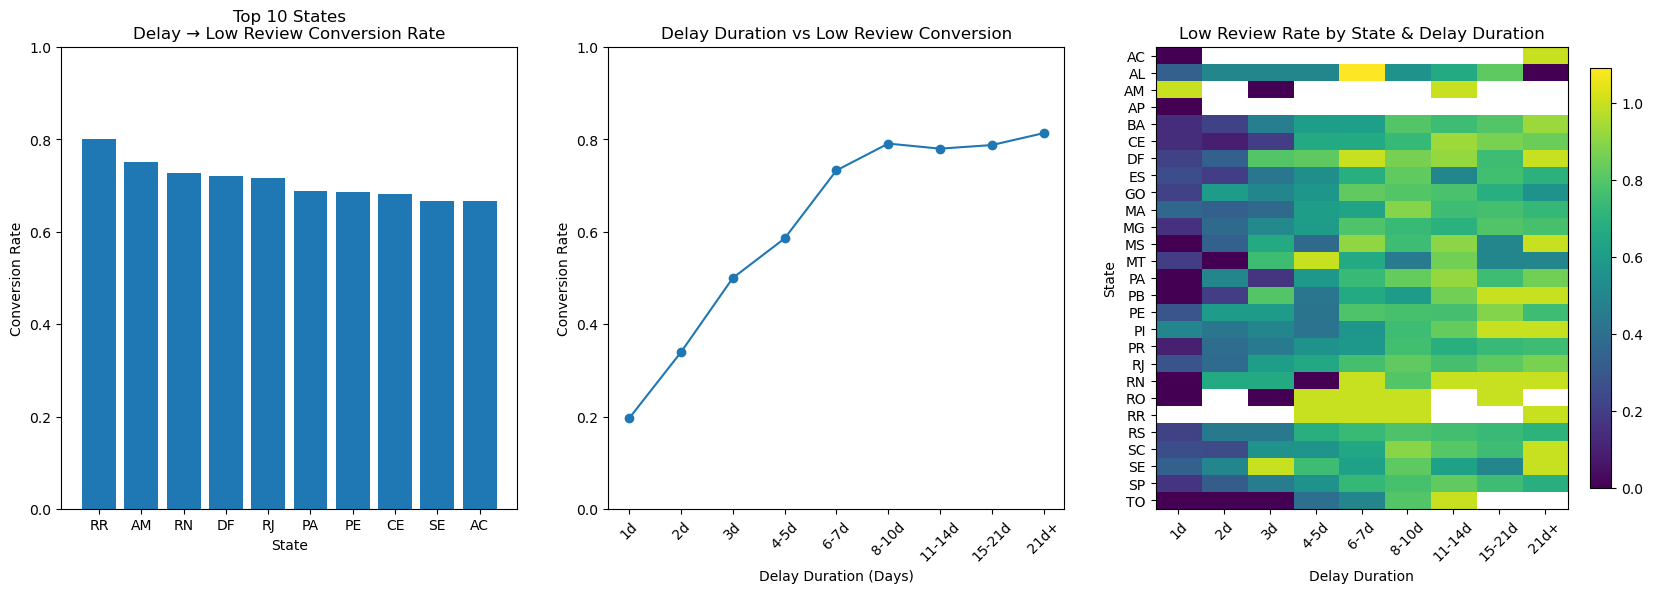

In [65]:
# 시각화
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(20, 6)
)

state_sorted = state_delay_rate.sort_values(
    "delay_to_low_review_rate", ascending=False
)

# 1번 : 배송 지연 시 저평점 전환율이 높은 상위 10개 주에 대해 전환율 시각화
top10_states = (
    state_delay_rate
    .sort_values("delay_to_low_review_rate", ascending=False)
    .head(10)
)

axes[0].bar(
    top10_states["customer_state"],
    top10_states["delay_to_low_review_rate"]
)

axes[0].set_title("Top 10 States\nDelay → Low Review Conversion Rate")
axes[0].set_xlabel("State")
axes[0].set_ylabel("Conversion Rate")
axes[0].set_ylim(0, 1)


# 2번 : 배송 지연 구간별 낮은 평점 전환율 시각화
axes[1].plot(
    delay_bin_rate["delay_bin"].astype(str),
    delay_bin_rate["delay_to_low_review_rate"],
    marker="o"
)

axes[1].set_title("Delay Duration vs Low Review Conversion")
axes[1].set_xlabel("Delay Duration (Days)")
axes[1].set_ylabel("Conversion Rate")
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis="x", rotation=45)

pivot_state_delay = state_delay_bin_rate.pivot(
    index="customer_state",
    columns="delay_bin",
    values="delay_to_low_review_rate"
)


# 3번 : 지역과 구간별 저평전 전환율 시각화
im = axes[2].imshow(pivot_state_delay, aspect="auto")

axes[2].set_title("Low Review Rate by State & Delay Duration")
axes[2].set_xlabel("Delay Duration")
axes[2].set_ylabel("State")

axes[2].set_xticks(range(len(pivot_state_delay.columns)))
axes[2].set_xticklabels(pivot_state_delay.columns.astype(str), rotation=45)

axes[2].set_yticks(range(len(pivot_state_delay.index)))
axes[2].set_yticklabels(pivot_state_delay.index)

fig.colorbar(im, ax=axes[2], fraction=0.046)

- cs, 운영 리스크를 확인하는 지표
- 전환율 높은 지역일 수록 배송 문제가 있을 경우 즉각적인 불만이 나와 초기 진입 시 CS 리스크가 큼

### 경쟁자들이 많이 없는 지역 탐색

In [66]:
# 주문 수(order_count) 상위 30개 주에서 배송 지연 시 저평점 전환율이 낮은 20개 주를 선택하여 경쟁자 분석 진행
# 앞에서 만든 region_summary DataFrame을 가공
top30_states_by_orders = (
    region_summary
    .sort_values("orders", ascending=False)
    .head(30)
)

# state_delay_rate와 merge
state_risk_with_volume = (
    top30_states_by_orders
    .merge(
        state_delay_rate,
        on="customer_state",
        how="left"
    )
)

# 지연 주문 수가 50개 이상인 곳 필터링
state_risk_with_volume = state_risk_with_volume[
    state_risk_with_volume["delayed_orders"] >= 50
]

# 전환율 낮은 순으로 20개 주 필터링
focus_states_df = (
    state_risk_with_volume
    .sort_values("delay_to_low_review_rate", ascending=True)
    .head(20)
)

focus_states = focus_states_df["customer_state"].tolist()

focus_states_df

,customer_state,buyers,orders,orders_per_buyer,delayed_orders,low_review_orders,avg_delay_days,delay_to_low_review_rate
13,MT,876,907,1.035388,53,27,10.641509,0.509434
4,PR,4882,5045,1.033388,199,102,8.450000,0.512563
0,SP,40302,41746,1.035829,1820,972,8.334065,0.534066
8,ES,1964,2033,1.035132,214,115,11.299065,0.537383
2,MG,11259,11635,1.033396,520,299,8.421456,0.575000
6,BA,3277,3380,1.031431,396,232,12.037500,0.585859
5,SC,3534,3637,1.029145,291,172,8.361775,0.591065
16,PB,519,536,1.032755,54,32,10.333333,0.592593
15,MS,694,715,1.030259,68,41,8.338235,0.602941
9,GO,1952,2020,1.034836,128,79,11.376923,0.617188


**수요 정보 생성**

In [67]:
# 지역, 카테고리 주문 수
state_category_orders = (
    order_items
    .merge(orders, on="order_id", how="left")
    .merge(customers, on="customer_id", how="left")
    .merge(products, on="product_id", how="left")
    .merge(category_translation, on="product_category_name", how="left")
    .groupby(["customer_state", "product_category_name_english"])
    .agg(
        order_count=("order_id", "nunique")
    )
    .reset_index()
)

# 전체 주문 기준으로 판매량이 높은 상위 20개 카테고리
top20_categories = (
    category_summary
    .sort_values("order_count", ascending=False)
    .head(20)["product_category_name_english"]
    .tolist()
)

# 상위 20개 카테고리로 제한
state_category_orders_focus = state_category_orders[
    (state_category_orders["customer_state"].isin(focus_states)) &
    (state_category_orders["product_category_name_english"].isin(top20_categories))
]


state_category_orders_focus

,customer_state,product_category_name_english,order_count
30,AL,auto,21
31,AL,baby,7
32,AL,bed_bath_table,19
35,AL,computers_accessories,34
36,AL,consoles_games,7
...,...,...,...
1312,SP,sports_leisure,3296
1313,SP,stationery,982
1315,SP,telephony,1521
1316,SP,toys,1612


**공급 정보 생성**

In [68]:
seller_count = (
    order_items
    .merge(products, on="product_id", how="left")
    .merge(category_translation, on="product_category_name", how="left")
    .merge(sellers, on="seller_id", how="left")
    .drop_duplicates(
        subset=["seller_id", "seller_state", "product_category_name_english"]
    )
    .groupby(["seller_state", "product_category_name_english"])
    .agg(
        seller_count=("seller_id", "nunique")
    )
    .reset_index()
)

seller_count.head()

,seller_state,product_category_name_english,seller_count
0,AC,books_technical,1
1,AM,telephony,1
2,BA,baby,1
3,BA,computers,2
4,BA,computers_accessories,4


In [69]:
# 수요와 공급 결합
competition_df = (
    state_category_orders_focus
    .merge(
        seller_count,
        left_on=["customer_state", "product_category_name_english"],
        right_on=["seller_state", "product_category_name_english"],
        how="left"
    )
)

# 컬럼명 변경
competition_df = competition_df.rename(
    columns={"customer_state": "state"}
)

competition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          400 non-null    object 
 1   product_category_name_english  400 non-null    object 
 2   order_count                    400 non-null    int64  
 3   seller_state                   219 non-null    object 
 4   seller_count                   219 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 15.8+ KB


In [70]:
# 셀러에 결측 정보 처리
competition_df["seller_count"] = competition_df["seller_count"].fillna(0)

In [71]:
# orders_per_seller : 지역 x 카테고리 조합별로 셀러 1명당 몇 건의 주문이 발생하는지
competition_df["orders_per_seller"] = (
    competition_df["order_count"] / competition_df["seller_count"]
)

competition_df.head()

,state,product_category_name_english,order_count,seller_state,seller_count,orders_per_seller
0,AL,auto,21,NaN,0.0,inf
1,AL,baby,7,NaN,0.0,inf
2,AL,bed_bath_table,19,NaN,0.0,inf
3,AL,computers_accessories,34,NaN,0.0,inf
4,AL,consoles_games,7,NaN,0.0,inf


In [72]:
# 기회가 많은 순 정렬 : orders_per_seller 기준으로 내림차순
opportunity_df = (
    competition_df
    .sort_values("orders_per_seller", ascending=False)
)

opportunity_df.head(20)

,state,product_category_name_english,order_count,seller_state,seller_count,orders_per_seller
0,AL,auto,21,NaN,0.0,inf
201,PA,baby,42,NaN,0.0,inf
186,MT,electronics,22,NaN,0.0,inf
187,MT,fashion_bags_accessories,13,NaN,0.0,inf
188,MT,furniture_decor,54,NaN,0.0,inf
189,MT,garden_tools,37,NaN,0.0,inf
191,MT,housewares,40,NaN,0.0,inf
192,MT,office_furniture,14,NaN,0.0,inf
194,MT,pet_shop,14,NaN,0.0,inf
195,MT,sports_leisure,70,NaN,0.0,inf


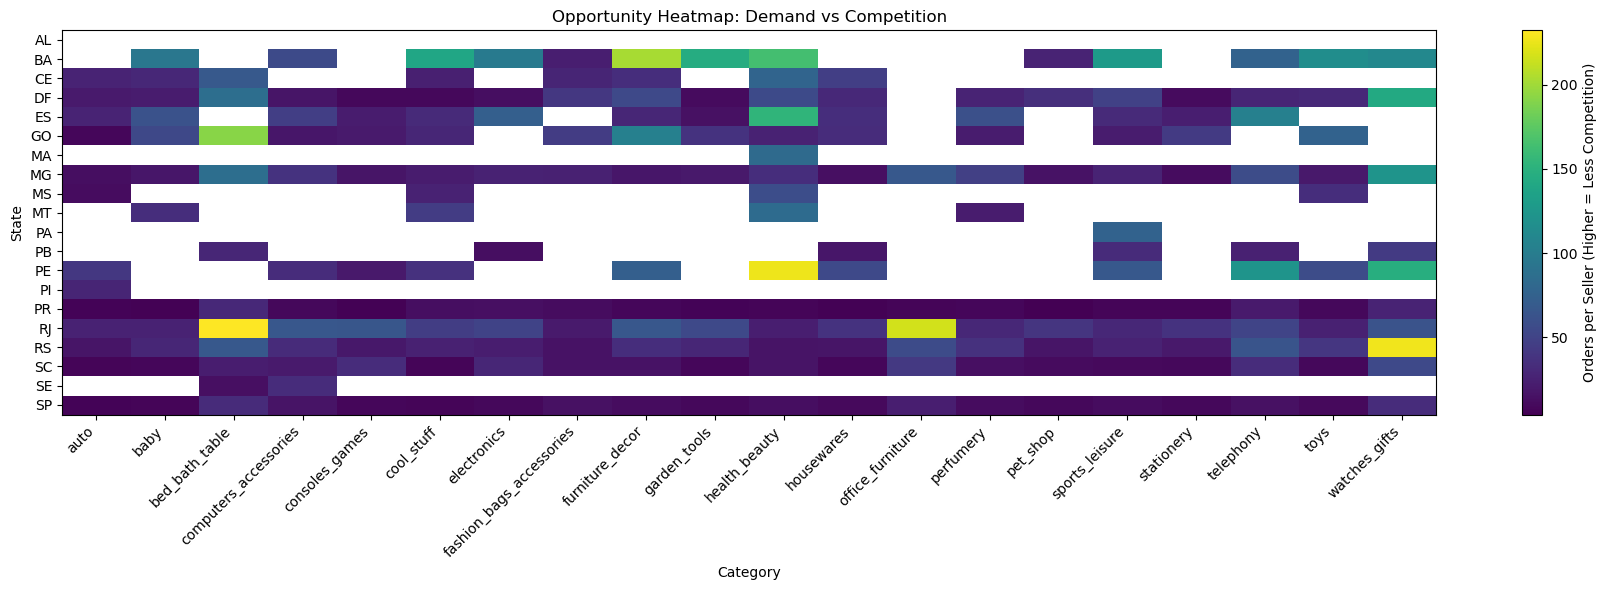

In [73]:
# 시각화
pivot_opportunity = opportunity_df.pivot(
    index="state",
    columns="product_category_name_english",
    values="orders_per_seller"
)

plt.figure(figsize=(18, 6))
plt.imshow(pivot_opportunity, aspect="auto")
plt.colorbar(label="Orders per Seller (Higher = Less Competition)")

plt.xticks(
    ticks=range(len(pivot_opportunity.columns)),
    labels=pivot_opportunity.columns,
    rotation=45,
    ha="right"
)
plt.yticks(
    ticks=range(len(pivot_opportunity.index)),
    labels=pivot_opportunity.index
)

plt.title("Opportunity Heatmap: Demand vs Competition")
plt.xlabel("Category")
plt.ylabel("State")

plt.tight_layout()
plt.show()

- 밝을 수록 셀러 1명당 해당 지역에서 처리하는 주문 수 많음
- 어두울 수록 해당 지역 내에서 셀러가 처리하는 주문 수가 없음
- 하얀색은 주문 발생이 없는 지역